<a href="https://colab.research.google.com/github/rafflds/An-lise-agrupamento-cart-o-cr-dito/blob/main/An%C3%A1lise_de_agrupamento_de_dados_de_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=teal>Machine Learning - Clustering


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# versão do Seaborn
print(sns.__version__)
# Instalar
!pip install seaborn == 0.9.0

## Análise Exploratóra

### Imports

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

### Lendo o dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Dados/CC GENERAL.csv')
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


### Traduzir colunas

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [ ]:
df.columns = ['SALDO','FREQUÊNCIA','COMPRAS','COMPRA_ÚNICA','COMPRAS_PARCELAS',
              'ADIANTAMENTO_DINHEIRO','FREQ_COMPRAS','FREQ_COMPRAS_ÚNICAS',
              'FREQ_COMPRAS_PARCELADAS','FREQ_ADIANT_CAIXA','DINHEIRO_TRX','COMPRA_TRX',
              'LIMITE_CRÉDITO','PAGAMENTOS','PAGAMENTOS_MÍN','PAGAMENTO_TOTAL']
df.head().round(2)

,SALDO,FREQUÊNCIA,COMPRAS,COMPRA_ÚNICA,COMPRAS_PARCELAS,ADIANTAMENTO_DINHEIRO,FREQ_COMPRAS,FREQ_COMPRAS_ÚNICAS,FREQ_COMPRAS_PARCELADAS,FREQ_ADIANT_CAIXA,DINHEIRO_TRX,COMPRA_TRX,LIMITE_CRÉDITO,PAGAMENTOS,PAGAMENTOS_MÍN,PAGAMENTO_TOTAL
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,NaN,0.00
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00


### Informações do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SALDO                    8950 non-null   float64
 1   FREQUÊNCIA               8950 non-null   float64
 2   COMPRAS                  8950 non-null   float64
 3   COMPRA_ÚNICA             8950 non-null   float64
 4   COMPRAS_PARCELAS         8950 non-null   float64
 5   ADIANTAMENTO_DINHEIRO    8950 non-null   float64
 6   FREQ_COMPRAS             8950 non-null   float64
 7   FREQ_COMPRAS_ÚNICAS      8950 non-null   float64
 8   FREQ_COMPRAS_PARCELADAS  8950 non-null   float64
 9   FREQ_ADIANT_CAIXA        8950 non-null   float64
 10  DINHEIRO_TRX             8950 non-null   int64  
 11  COMPRA_TRX               8950 non-null   int64  
 12  LIMITE_CRÉDITO           8949 non-null   float64
 13  PAGAMENTOS               8950 non-null   float64
 14  PAGAMENTOS_MÍN          

### Valores nulos

In [ ]:
df.isnull().sum()

SALDO                        0
FREQUÊNCIA                   0
COMPRAS                      0
COMPRA_ÚNICA                 0
COMPRAS_PARCELAS             0
ADIANTAMENTO_DINHEIRO        0
FREQ_COMPRAS                 0
FREQ_COMPRAS_ÚNICAS          0
FREQ_COMPRAS_PARCELADAS      0
FREQ_ADIANT_CAIXA            0
DINHEIRO_TRX                 0
COMPRA_TRX                   0
LIMITE_CRÉDITO               1
PAGAMENTOS                   0
PAGAMENTOS_MÍN             313
PAGAMENTO_TOTAL              0
dtype: int64

In [ ]:
df.fillna(df.median(), inplace=True)
null = df.isnull().sum()
null

SALDO                      0
FREQUÊNCIA                 0
COMPRAS                    0
COMPRA_ÚNICA               0
COMPRAS_PARCELAS           0
ADIANTAMENTO_DINHEIRO      0
FREQ_COMPRAS               0
FREQ_COMPRAS_ÚNICAS        0
FREQ_COMPRAS_PARCELADAS    0
FREQ_ADIANT_CAIXA          0
DINHEIRO_TRX               0
COMPRA_TRX                 0
LIMITE_CRÉDITO             0
PAGAMENTOS                 0
PAGAMENTOS_MÍN             0
PAGAMENTO_TOTAL            0
dtype: int64

### Visualizar alguns valores

In [ ]:
maiorS = df['LIMITE_CRÉDITO'].max()
maiorD = df['COMPRAS'].max()
parcelas = df['COMPRAS_PARCELAS'].value_counts().max()

print(f'Maior limite de crédito: {maiorS}')
print(f'Maior valor em compras: {maiorD}')
print(f'Quantidade máxima de parcelas: {parcelas}')

Maior limite de crédito: 30000.0
Maior valor em compras: 49039.57
Quantidade máxima de parcelas: 3916


### Histograma

> Dataset com uma concentração de valores abaixo de 3mil

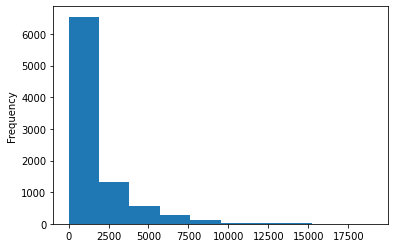

In [ ]:
df.SALDO.plot(kind='hist')

### Dados estatísticos

> Discrepancia dos dados estão altissímas

In [ ]:
df.SALDO.describe().round()

count     8950.0
mean      1564.0
std       2082.0
min          0.0
25%        128.0
50%        873.0
75%       2054.0
max      19043.0
Name: SALDO, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


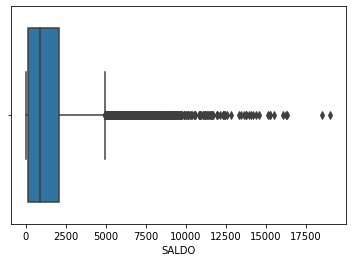

In [ ]:
sns.boxplot(df.SALDO)

## Machine Learning

## Normalizar os dados

> As escalas dos dados acima estão muito diferentes, terá que se normalizado os dados, p/ uma variável não ter mais importância que a outra.

In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

## Treinamento de maquina (Clustering)

> algoritmos de machine learning não supervisionados (Clustering), usado quando não existe rótulos no dataset
5 grupos, rodando 10x, sendo obrigado a retorna o mesmo resultado em ambas execuções.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

## Critério de validação - Silhouette

> Externas: Necessitam de Labels

> Internas: Não necessitam de Labels
Compactação

> Quanto mais próximos estiverem os pontos uns dos outros mais compactado os dados.

> **Métrica de Silhouette: vai de -1 até 1 (quanto mais próximo de 1 positivo, melhor);**





In [ ]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36454411415175675


## Davies-Bouldin

> Calcular a distância média entre cada ponto do cluster e seu centroide.

> **Métrica de Davies Bouldin: quanto mais próximo de 0 o valor, melhor);**

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0759640420985466


## Calinski-Harabasz

> leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.

> **Métrica de Calinski: valor seja o mais alto possível.**

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7970107150363


## A validação relativa
> Criar uma função p/ testar parâmetros novos nos critérios de validação.

In [ ]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters = n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [ ]:
s1, dbs1, cal1 = clustering_algorithm(3, values)
print(s1, dbs1, cal1)

0.3271378885807343 1.310173917319483 3526.4524659371787


In [ ]:
# Melhor modelo
s2, dbs2, cal2 = clustering_algorithm(5, values)
print(s2, dbs2, cal2)

0.34852928204523576 1.1527134855876944 3422.8382083377455


In [ ]:
s3, dbs3, cal3 = clustering_algorithm(10, values)
print(s3, dbs3, cal3)

0.3502512978283904 1.1210416316050558 3018.9872864933077


## Estrutura dos clusters

> Criar valores aleatórios com a mesma quantidade de dados e variáveis.

> Motivo: comparar o score dos dados gerados de forma aleatória com os dados do dataset; Verificar se o modelo está obtendo um bom resultado.

In [ ]:
df.count()

SALDO                      8950
FREQUÊNCIA                 8950
COMPRAS                    8950
COMPRA_ÚNICA               8950
COMPRAS_PARCELAS           8950
ADIANTAMENTO_DINHEIRO      8950
FREQ_COMPRAS               8950
FREQ_COMPRAS_ÚNICAS        8950
FREQ_COMPRAS_PARCELADAS    8950
FREQ_ADIANT_CAIXA          8950
DINHEIRO_TRX               8950
COMPRA_TRX                 8950
LIMITE_CRÉDITO             8950
PAGAMENTOS                 8950
PAGAMENTOS_MÍN             8950
PAGAMENTO_TOTAL            8950
dtype: int64

In [ ]:
# Meu modelo saiu muito superior a um modelo aleatório
random_data = np.random.rand(8950, 16)
s, dbs, cal = clustering_algorithm(5, random_data)
# Resultado do conjunto aleatório
print(f'Resultado do conjunto gerado de forma aleatória: {s, dbs, cal}')
# Dataset normalizado
print(f'Resultado do dataset normalizado e treinado, usando melhor métrica: {s2, dbs2, cal2}')

Resultado do conjunto gerado de forma aleatória: (0.03932738056535126, 3.5250210371905917, 303.28152665010043)
Resultado do dataset normalizado e treinado, usando melhor métrica: (0.34852928204523576, 1.1527134855876944, 3422.8382083377455)


## Estabilidade dos clusters

> Objetivo: dividir a base de dados, para cada uma dessas divisões obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

In [ ]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, cal1 = clustering_algorithm(5, set1)
s2, dbs2, cal2 = clustering_algorithm(5, set2)
s3, dbs3, cal3 = clustering_algorithm(5, set3)
print('Teste1:',s1, dbs1, cal1)
print('Teste2:',s2, dbs2, cal2)
print('Teste3:',s3, dbs3, cal3)

Teste1: 0.36908155221853267 1.0580445685596032 1204.0558494933455
Teste2: 0.35416642754504835 1.1382306445993162 1194.9519865048878
Teste3: 0.36713104970461446 1.0991014125845049 1167.5075975296127


## frequências quantitativas

> Passo 1 - especificar os limites de cada classe

* 'F' = 1mil de crédito,
* 'E' = 3mil de crédito,
* 'D' = 5mil de crédito,
* 'C' = 10mil de crédito,
* 'B' = 15mil de crédito,
* 'A' = 30mil de crédito

In [ ]:
classes = [0,1000,3000,5000,10000, 15000, 30000]
labels_2 =  ['F','E','D','C','B','A']

In [ ]:
frequencia = pd.value_counts(pd.cut(x= df.LIMITE_CRÉDITO, bins=classes, labels = labels_2, 
                    include_lowest =True))

data = pd.DataFrame(frequencia)
data

,LIMITE_CRÉDITO
E,3753
C,2211
D,1468
F,831
B,535
A,152


## Média de compras parceladas por Clusters

In [ ]:
df['cluster'] = labels
df.groupby('cluster').mean()['COMPRAS_PARCELAS'].round()

cluster
0    1147.0
1     316.0
2     152.0
3     671.0
4     190.0
Name: COMPRAS_PARCELAS, dtype: float64

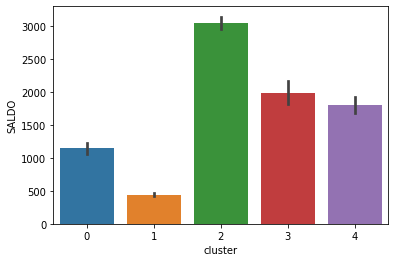

In [ ]:
# maior16 = contagem.query('total > 16')
sns.barplot(x='cluster', y='SALDO', data=df)

**Quantidade de dados em cada clusters**

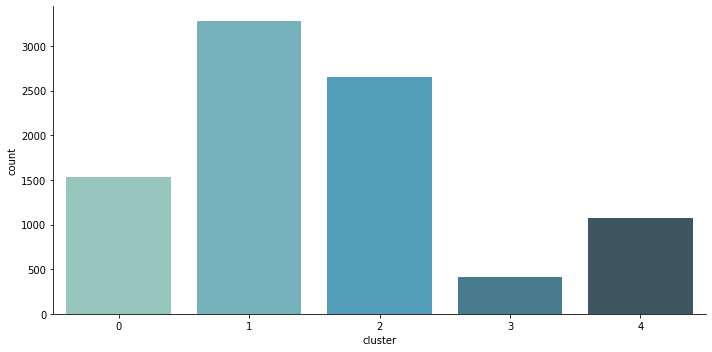

In [ ]:
sns.catplot(x ="cluster", kind="count", 
            data = df, aspect=2, palette="GnBu_d")  

## Selecionando os atributos
> Pegando os centroids com maiores valores de variância

In [ ]:
centroids = kmeans.cluster_centers_
max = len(centroids[0])
for i in range(max):
    print(df.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

SALDO 
0.0224
FREQUÊNCIA 
0.0000
COMPRAS 
0.0197
COMPRA_ÚNICA 
0.0076
COMPRAS_PARCELAS 
0.0036
ADIANTAMENTO_DINHEIRO 
0.0225
FREQ_COMPRAS 
0.0000
FREQ_COMPRAS_ÚNICAS 
0.0000
FREQ_COMPRAS_PARCELADAS 
0.0000
FREQ_ADIANT_CAIXA 
0.0000
DINHEIRO_TRX 
0.0000
COMPRA_TRX 
0.0000
LIMITE_CRÉDITO 
0.0360
PAGAMENTOS 
0.0279
PAGAMENTOS_MÍN 
0.0543
PAGAMENTO_TOTAL 
0.0000


## Filtrando

In [ ]:
description = df.groupby('cluster')['SALDO','COMPRAS','ADIANTAMENTO_DINHEIRO','LIMITE_CRÉDITO','PAGAMENTOS', 'PAGAMENTOS_MÍN']
n_clients = description.size()  # quantidade de clientes por cluster
description = description.mean() # usada a média de valores
description['n_clients'] = n_clients  # criando uma variável p/ salvar a quantidade de clientes
dados = pd.DataFrame(description)  # Transformando em um Dataframe
dados.round()

<ipython-input-35-038fa14b35f2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby('cluster')['SALDO','COMPRAS','ADIANTAMENTO_DINHEIRO','LIMITE_CRÉDITO','PAGAMENTOS', 'PAGAMENTOS_MÍN']


,SALDO,COMPRAS,ADIANTAMENTO_DINHEIRO,LIMITE_CRÉDITO,PAGAMENTOS,PAGAMENTOS_MÍN,n_clients
cluster,,,,,,,
0,1143.0,3274.0,182.0,4097.0,3037.0,543.0,1536
1,444.0,629.0,141.0,5131.0,814.0,229.0,3280
2,3038.0,385.0,1637.0,4496.0,969.0,1022.0,2649
3,1988.0,855.0,421.0,2228.0,1336.0,6042.0,411
4,1794.0,478.0,3267.0,3983.0,4712.0,734.0,1074


## Melhores pagadores

In [ ]:
df.groupby('cluster')['PAGAMENTO_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1536.0,0.278331,0.367137,0.0,0.0,0.083333,0.545455,1.0
1,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
2,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
3,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
4,1074.0,0.117321,0.186720,0.0,0.0,0.083333,0.142857,1.0


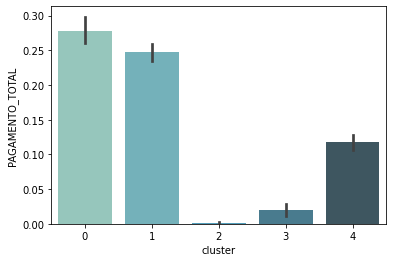

In [ ]:
sns.barplot(x='cluster', y='PAGAMENTO_TOTAL', palette='GnBu_d', data = df)